In [1]:
from evaluator import FiLMModelEvaluator
from utils import *
from dataset import SciplexDatasetUnseenPerturbations

import anndata as ad
import math

In [2]:
drugs_list = list(ad.read_h5ad("../data/sciplex/sciplex_preprocessed.h5ad").obs['product_name'].unique())

In [3]:
def split_list(lst):
    # Calculate the split sizes
    total_len = len(lst)
    split_70 = math.floor(total_len * 0.7)
    split_85 = math.floor(total_len * 0.85)

    # Split the list into three parts
    train = lst[:split_70]    # First 70% (training set)
    val = lst[split_70:split_85]   # Next 15% (validation set)
    test = lst[split_85:]     # Remaining 15% (test set)

    return train, val, test

train_drugs, validation_drugs, test_drugs = split_list(drugs_list)

In [4]:
ad_path = "../data/sciplex/sciplex_preprocessed.h5ad"

dataset_train = SciplexDatasetUnseenPerturbations(ad_path, train_drugs)
dataset_validation = SciplexDatasetUnseenPerturbations(ad_path, validation_drugs)
dataset_test = SciplexDatasetUnseenPerturbations(ad_path, test_drugs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 571906/571906 [00:41<00:00, 13860.62it/s]


In [12]:
evalautor = FiLMModelEvaluator("../config/FiLM.yaml", dataset_train, dataset_validation, dataset_test)
evalautor.train()
evalautor.test()
results = evalautor.get_test_results()
results = get_model_stats(results)

Begin training ...
Epoch 1/1
Iteration: 10 Test Loss: 0.37151220440864563 Avg. Validation Loss: 0.19753815482060114
Iteration: 20 Test Loss: 0.25892722606658936 Avg. Validation Loss: 0.14349075461979266
Iteration: 30 Test Loss: 0.2187587022781372 Avg. Validation Loss: 0.12182391356722808
Iteration: 40 Test Loss: 0.1992243379354477 Avg. Validation Loss: 0.1083910152040146
Iteration: 50 Test Loss: 0.18639183044433594 Avg. Validation Loss: 0.09830310499226605
Iteration: 60 Test Loss: 0.17604944109916687 Avg. Validation Loss: 0.09116581914785468
Iteration: 70 Test Loss: 0.16700401902198792 Avg. Validation Loss: 0.08438565600433467
Iteration: 80 Test Loss: 0.15771999955177307 Avg. Validation Loss: 0.0786406106694981
Iteration: 90 Test Loss: 0.15023252367973328 Avg. Validation Loss: 0.0744457984412158
Iteration: 100 Test Loss: 0.14568422734737396 Avg. Validation Loss: 0.07133700928570312
Iteration: 110 Test Loss: 0.14114920794963837 Avg. Validation Loss: 0.06859853960297725
Iteration: 120 Te

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [00:02<00:00, 66.44it/s]


Testing completed. Results stored in 'self.test_results'.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:06<00:00,  4.41it/s]


Avg Pred Loss: 0.054264162786011656
Avg Null Loss: 0.03268675496388509


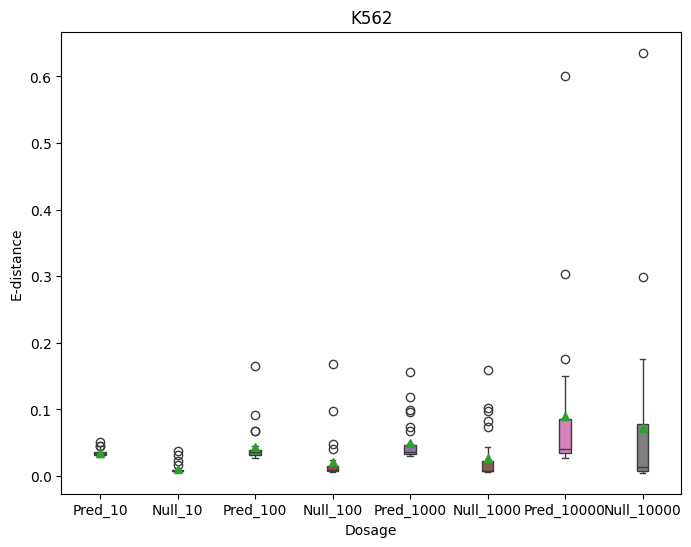

Avg Pred Loss: 0.06375699607681906
Avg Null Loss: 0.03844507225728526


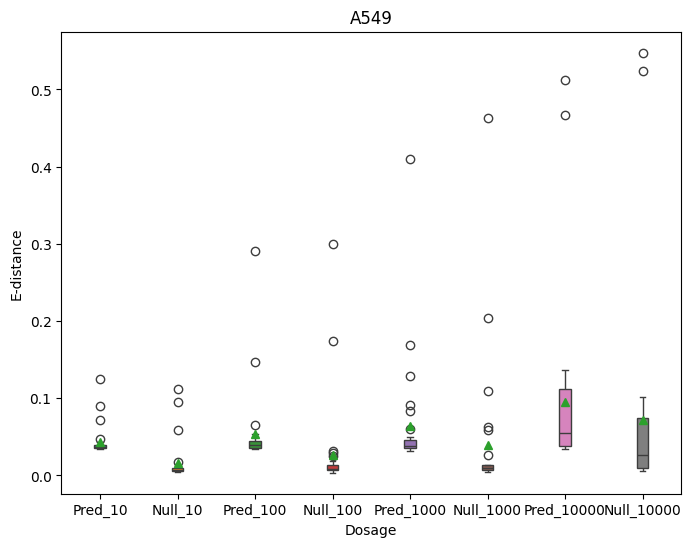

Avg Pred Loss: 0.07720201369773012
Avg Null Loss: 0.037723245516759


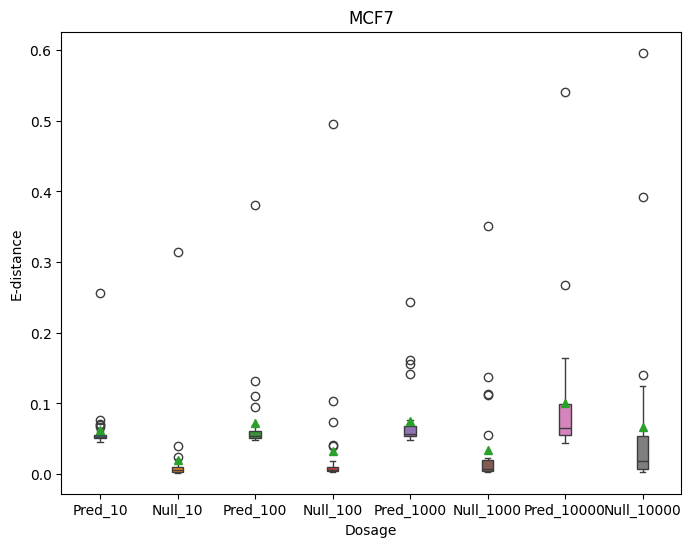

In [13]:
plot_results(results, "K562")
plot_results(results, "A549")
plot_results(results, "MCF7")

In [12]:
results

({'K562_ITSA-1 (ITSA1)_10.0': np.float64(0.024374943525008328),
  'K562_ITSA-1 (ITSA1)_100.0': np.float64(0.027869812939815004),
  'K562_ITSA-1 (ITSA1)_1000.0': np.float64(0.028936963521392918),
  'K562_ITSA-1 (ITSA1)_10000.0': np.float64(0.02614772072655667),
  'K562_AZ 960_10.0': np.float64(0.027110061974099698),
  'K562_AZ 960_100.0': np.float64(0.0336341703547097),
  'K562_AZ 960_1000.0': np.float64(0.03707132299325808),
  'K562_AZ 960_10000.0': np.float64(0.04401747042891146),
  'K562_Epothilone A_10.0': np.float64(0.05064888564917129),
  'K562_Epothilone A_100.0': np.float64(0.08683833259272188),
  'K562_Epothilone A_1000.0': np.float64(0.10283907191448521),
  'K562_Epothilone A_10000.0': np.float64(0.05659571175702133),
  'K562_Cerdulatinib (PRT062070, PRT2070)_10.0': np.float64(0.029472739156027373),
  'K562_Cerdulatinib (PRT062070, PRT2070)_100.0': np.float64(0.03341604554288945),
  'K562_Cerdulatinib (PRT062070, PRT2070)_1000.0': np.float64(0.03577295493464156),
  'K562_Cerdu